In [81]:
import numpy as np
import pandas as pd

In [82]:
iris = pd.read_csv("../DATA/iris.csv")

In [83]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## Data Processing

### Features and Target

In [84]:
iris.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [85]:
X = iris.drop('species',axis=1)
y = iris['species']

In [86]:
iris['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [87]:
# Lots of ways to one hot encode
# https://stackoverflow.com/questions/47573293/unable-to-transform-string-column-to-categorical-matrix-using-keras-and-sklearn
# https://stackoverflow.com/questions/35107559/one-hot-encoding-of-string-categorical-features

In [88]:
from sklearn.preprocessing import LabelBinarizer
encoder = LabelBinarizer()
y = encoder.fit_transform(y)

In [89]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [90]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

### Scaling

In [91]:
scaler = MinMaxScaler()

In [92]:
scaler.fit(X_train)

MinMaxScaler()

In [93]:
scaled_X_train = scaler.transform(X_train)

In [94]:
scaled_X_test = scaler.transform(X_test)

## Model


### Creating the Model

In [95]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [96]:
model = Sequential()
model.add(Dense(units=4,activation='relu',input_shape=[4,]))

# Last layer for multi-class classification of 3 species
model.add(Dense(units=3,activation='softmax'))

model.compile(optimizer='adam',
              loss='categorical_crossentropy',metrics=['accuracy'])

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


## Model Training

In [97]:
from tensorflow.keras.callbacks import EarlyStopping

In [98]:
early_stop = EarlyStopping(patience=10)

In [99]:
model.fit(x=scaled_X_train, 
          y=y_train, 
          epochs=300,
          validation_data=(scaled_X_test, y_test), verbose=1 ,callbacks=[early_stop]         )

Epoch 1/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.3083 - loss: 1.3451 - val_accuracy: 0.3333 - val_loss: 1.2998
Epoch 2/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.3135 - loss: 1.3272 - val_accuracy: 0.3333 - val_loss: 1.2911
Epoch 3/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.3479 - loss: 1.2890 - val_accuracy: 0.3333 - val_loss: 1.2827
Epoch 4/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.3208 - loss: 1.2783 - val_accuracy: 0.3333 - val_loss: 1.2745
Epoch 5/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3406 - loss: 1.2771 - val_accuracy: 0.3333 - val_loss: 1.2665
Epoch 6/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.3281 - loss: 1.2653 - val_accuracy: 0.3333 - val_loss: 1.2587
Epoch 7/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.3333 - loss: 1.2492 - val_accuracy: 0.3333 - val_loss: 1.2512
Epoch 8/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.3031 - loss: 1.2769 - val_accuracy: 0.3333 - val_loss: 

## Model Evaluation

In [100]:
metrics = pd.DataFrame(model.history.history)

In [101]:
metrics

,accuracy,loss,val_accuracy,val_loss
0,0.333333,1.313237,0.333333,1.299771
1,0.333333,1.301942,0.333333,1.291144
2,0.333333,1.290823,0.333333,1.282745
3,0.333333,1.280289,0.333333,1.274488
4,0.333333,1.269678,0.333333,1.266461
...,...,...,...,...
295,0.758333,0.491601,0.700000,0.538908
296,0.758333,0.490668,0.700000,0.537955
297,0.758333,0.489732,0.700000,0.537002
298,0.758333,0.488794,0.700000,0.536128


<Axes: >

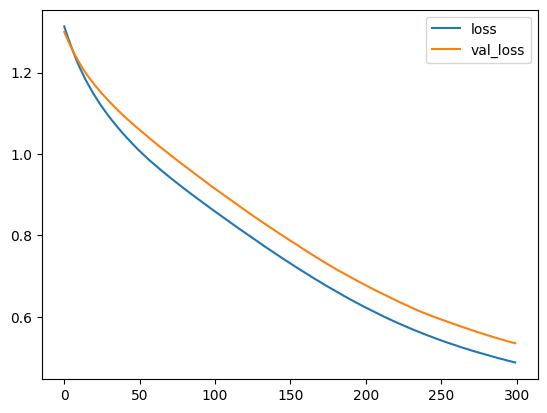

In [102]:
metrics[['loss','val_loss']].plot()

<Axes: >

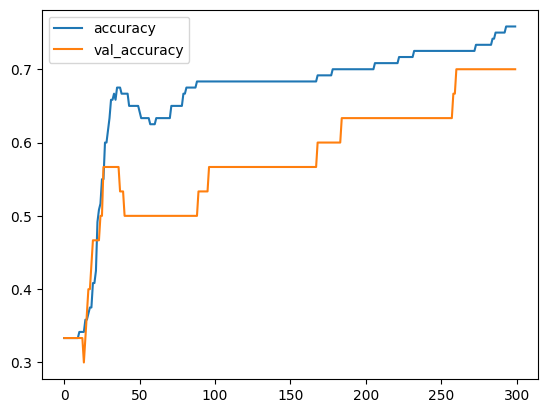

In [103]:
metrics[['accuracy','val_accuracy']].plot()

In [104]:
model.evaluate(scaled_X_test,y_test,verbose=0)

[0.5353176593780518, 0.699999988079071]

## Ready Model for Deployment

In [105]:
epochs = len(metrics)

In [106]:
scaled_X = scaler.fit_transform(X)

In [107]:
model = Sequential()
model.add(Dense(units=4,activation='relu'))

# Last layer for multi-class classification of 3 species
model.add(Dense(units=3,activation='softmax'))

model.compile(optimizer='adam',
              loss='categorical_crossentropy',metrics=['accuracy'])

In [108]:
model.fit(scaled_X,y,epochs=epochs)

Epoch 1/300
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3503 - loss: 1.1460  
Epoch 2/300
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3442 - loss: 1.1254 
Epoch 3/300
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3238 - loss: 1.1303 
Epoch 4/300
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3585 - loss: 1.1211 
Epoch 5/300
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3208 - loss: 1.1272 
Epoch 6/300
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3574 - loss: 1.1088 
Epoch 7/300
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4141 - loss: 1.0993 
Epoch 8/300
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4512 - loss: 1.1088 
Epoch 9/300
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5355 - loss: 1.0823 
Epoch 10/300
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5774 - loss: 1.0827 
Epoch 11/300
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5868 - loss: 1.0695 
Epoch 12/300
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6035 - lo

In [109]:
model.save("final_iris_model.keras")

### Saving Scaler

In [110]:
import joblib

In [111]:
joblib.dump(scaler,'iris_scaler.pkl')

['iris_scaler.pkl']

## Predicting a Single New Flower

In [112]:
from tensorflow.keras.models import load_model

In [113]:
flower_model = load_model("final_iris_model.h5")
flower_scaler = joblib.load("iris_scaler.pkl")

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/optimizers/base_optimizer.py:86: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


In [114]:
iris.head(1)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa


In [115]:
flower_example = {'sepal_length':5.1,
                 'sepal_width':3.5,
                 'petal_length':1.4,
                 'petal_width':0.2}

In [116]:
flower_example.keys()

dict_keys(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])

In [117]:
encoder.classes_

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [ ]:
def return_prediction(model, scaler, sample_json):
    s_len = sample_json['sepal_length']
    s_wid = sample_json['sepal_width']
    p_len = sample_json['petal_length']
    p_wid = sample_json['petal_width']

    # Step 1: Create array
    flower = np.array([[s_len, s_wid, p_len, p_wid]], dtype=np.float32)
    
    # Step 2: Scale
    flower = scaler.transform(flower) 

    # Step 3: Reshape for 3D input
    flower = np.expand_dims(flower, axis=1)  

    # Step 4: Predict
    probs = model.predict(flower)
    class_index = np.argmax(probs, axis=1)

    classes = np.array(['setosa', 'versicolor', 'virginica'])
    return classes[class_index[0]]


In [119]:
return_prediction(flower_model,flower_scaler,flower_example)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


array(['setosa', 'setosa', 'setosa'], dtype='<U10')

# CODE FOR DEPLOYMENT:

In [123]:
from tensorflow.keras.models import load_model
import joblib


flower_model = load_model("final_iris_model.keras")
flower_scaler = joblib.load("iris_scaler.pkl")


def return_prediction(model,scaler,sample_json):
    
    # For larger data features, you should probably write a for loop
    # That builds out this array for you
    
    s_len = sample_json['sepal_length']
    s_wid = sample_json['sepal_width']
    p_len = sample_json['petal_length']
    p_wid = sample_json['petal_width']
    
    flower = [[s_len,s_wid,p_len,p_wid]]
    
    flower = scaler.transform(flower)
    
    classes = np.array(['setosa', 'versicolor', 'virginica'])
    
    class_ind = np.argmax(model.predict(flower), axis=1)
    return classes[class_ind[0]]

In [124]:
flower_example = {
"sepal_length":5.1,
"sepal_width":3.5,
"petal_length":1.4,
"petal_width":0.2
}

In [125]:
return_prediction(flower_model,flower_scaler,flower_example)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


'setosa'